In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
d = [['SPb','Russia',0, 5400000],['Moscow','Russia',1, 12700000],['Madrid','Spain',1, 3400000],
     ['Barcelona','Spain',0, 1700000], ['Antverpen', 'Netherlands', 0, 550000], ['Amsterdam', 'Netherlands', 1, 900000]]
d

[['SPb', 'Russia', 0, 5400000],
 ['Moscow', 'Russia', 1, 12700000],
 ['Madrid', 'Spain', 1, 3400000],
 ['Barcelona', 'Spain', 0, 1700000],
 ['Antverpen', 'Netherlands', 0, 550000],
 ['Amsterdam', 'Netherlands', 1, 900000]]

In [17]:
df = pd.DataFrame(d, columns=['City','Country','isCapital?', 'Population'])
#df = df.groupby('Country', as_index=True).agg({'Population': 'mean'}).sort_values(by='Population', ascending=False)
df

,City,Country,isCapital?,Population
0,SPb,Russia,0,5400000
1,Moscow,Russia,1,12700000
2,Madrid,Spain,1,3400000
3,Barcelona,Spain,0,1700000
4,Antverpen,Netherlands,0,550000
5,Amsterdam,Netherlands,1,900000


In [18]:
print(df.groupby('Country').max()[['Population']])

             Population
Country                
Netherlands      900000
Russia         12700000
Spain           3400000


In [19]:
'''df = df.append(df.mean(axis=0), ignore_index=True).round()
df.iloc[6:7, 0:3] = ''
df'''

"df = df.append(df.mean(axis=0), ignore_index=True).round()\ndf.iloc[6:7, 0:3] = ''\ndf"

In [20]:
b = ['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']
df2 = pd.DataFrame(b, columns=['Continent'])
df2

,Continent
0,Europe
1,Europe
2,Europe
3,Europe
4,Europe
5,Europe


In [21]:
df_new = df.join(df2)
df_new

,City,Country,isCapital?,Population,Continent
0,SPb,Russia,0,5400000,Europe
1,Moscow,Russia,1,12700000,Europe
2,Madrid,Spain,1,3400000,Europe
3,Barcelona,Spain,0,1700000,Europe
4,Antverpen,Netherlands,0,550000,Europe
5,Amsterdam,Netherlands,1,900000,Europe


In [22]:
c = [['Washington', 'USA', 1, 700000, 'North America'], ['New-York', 'USA', 0, 8500000, 'North America']]
df3 = pd.DataFrame(c, columns=['City','Country','isCapital?', 'Population', 'Continent'])
df3

,City,Country,isCapital?,Population,Continent
0,Washington,USA,1,700000,North America
1,New-York,USA,0,8500000,North America


In [23]:
df4 = pd.concat([df_new, df3], ignore_index=True)
df4.sort_values('Population', inplace=True)
df4

,City,Country,isCapital?,Population,Continent
4,Antverpen,Netherlands,0,550000,Europe
6,Washington,USA,1,700000,North America
5,Amsterdam,Netherlands,1,900000,Europe
3,Barcelona,Spain,0,1700000,Europe
2,Madrid,Spain,1,3400000,Europe
0,SPb,Russia,0,5400000,Europe
7,New-York,USA,0,8500000,North America
1,Moscow,Russia,1,12700000,Europe


In [24]:
df4.groupby('Country').mean()['Population'].sort_values(ascending=False).to_frame()

,Population
Country,
Russia,9050000.0
USA,4600000.0
Spain,2550000.0
Netherlands,725000.0


In [25]:
'''tmp_df = df4.copy()
tmp_df.sort_values('Country', ascending=False, inplace=True)
tmp_df = tmp_df[tmp_df['isCapital?'] == 1] 
tmp_df = tmp_df[tmp_df['Population'] > 100000]
pd.pivot_table(tmp_df, values='Population', index=['Country'], columns=['Continent'], aggfunc=np.sum, fill_value='')'''

"tmp_df = df4.copy()\ntmp_df.sort_values('Country', ascending=False, inplace=True)\ntmp_df = tmp_df[tmp_df['isCapital?'] == 1] \ntmp_df = tmp_df[tmp_df['Population'] > 100000]\npd.pivot_table(tmp_df, values='Population', index=['Country'], columns=['Continent'], aggfunc=np.sum, fill_value='')"

In [26]:
df4['Population'].values.reshape(-1,1)

array([[  550000],
       [  700000],
       [  900000],
       [ 1700000],
       [ 3400000],
       [ 5400000],
       [ 8500000],
       [12700000]], dtype=int64)

In [27]:
df4

,City,Country,isCapital?,Population,Continent
4,Antverpen,Netherlands,0,550000,Europe
6,Washington,USA,1,700000,North America
5,Amsterdam,Netherlands,1,900000,Europe
3,Barcelona,Spain,0,1700000,Europe
2,Madrid,Spain,1,3400000,Europe
0,SPb,Russia,0,5400000,Europe
7,New-York,USA,0,8500000,North America
1,Moscow,Russia,1,12700000,Europe


In [28]:
df4.groupby('Country')['Population'].transform('sum').to_frame()

,Population
4,1450000
6,9200000
5,1450000
3,5100000
2,5100000
0,18100000
7,9200000
1,18100000


In [29]:
df4.groupby('Country')['Population'].sum().to_frame()

,Population
Country,
Netherlands,1450000
Russia,18100000
Spain,5100000
USA,9200000


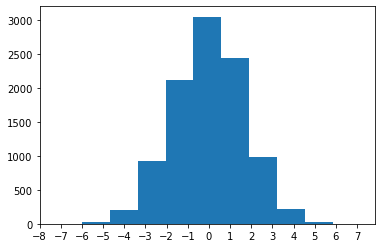

In [105]:
res = []
for i in range(10000):
    res.append(np.random.normal(0, 5, (3,3)).mean())
plt.hist(res)
plt.xticks(range(-8,8,1))
plt.show()